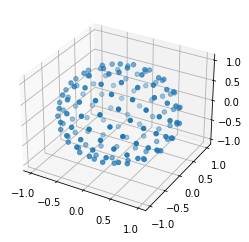

In [1]:
from numpy import pi, cos, sin, arccos, arange
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
from tifffile import imsave
import math

def Fibonacci(N):
    F0 = 1
    F = 1
    sum = 0
    for i in range(N - 2):
        sum = F0 + F
        F0 = F
        F = sum
    return F
Fibo_n = 12
num_pts = Fibonacci(Fibo_n)
indices = arange(0, num_pts, dtype=float)
phi = arccos(1 - 2 * indices/num_pts)
theta = pi * indices * 2 * num_pts/Fibonacci(Fibo_n - 1)
lx, ly, lz = cos(theta) * sin(phi), sin(theta) * sin(phi), cos(phi)
pp.figure().add_subplot(111, projection='3d').scatter(lx, ly, lz)
pp.show()

In [9]:
FRAME_SIZE = 40
HALF_SIZE = int(FRAME_SIZE/2)
WIDTH = 3
def Generate3DLinePattern(lx,ly,lz,lw):
    weight = np.zeros([FRAME_SIZE,FRAME_SIZE,HALF_SIZE])
    for i in range(FRAME_SIZE):
        for j in range(FRAME_SIZE):
            for k in range(HALF_SIZE):
                x = i-HALF_SIZE
                y = j-HALF_SIZE
                z = k*2-HALF_SIZE
                dist_square = x**2 + y**2 + z**2 - (x*lx + y*ly + z*lz)**2
                if dist_square < lw**2 and x**2 + y**2 + z**2 < 2500:
                    weight[i,j,k] = 1
                else:
                    weight[i,j,k] = 0 
    return weight-np.mean(weight)
image = np.zeros([len(indices)*2, FRAME_SIZE,FRAME_SIZE,HALF_SIZE])
for w in range(2):
    for n in range(len(indices)):
        image[n+w*len(indices),:,:,:] = Generate3DLinePattern(lx[n], ly[n], lz[n], (w+1)*WIDTH)
    #image1 = image1 + image[:,:,:,n]
#image1 = image1>0
#imsave('images/Line_Pattern.tif',image1.astype(float))
np.save('np arrays/Line_Pattern', image)

-0.015625
-0.01834375
-0.018
-0.0185
-0.0186875
-0.01921875
-0.01903125
-0.0195625
-0.02003125
-0.02065625
-0.0205
-0.0209375
-0.02134375
-0.02146875
-0.02209375
-0.02240625
-0.02271875
-0.023125
-0.02403125
-0.02375
-0.02465625
-0.024375
-0.02534375
-0.02428125
-0.0255625
-0.0243125
-0.0256875
-0.02503125
-0.02396875
-0.02534375
-0.02290625
-0.026
-0.02203125
-0.02665625
-0.02115625
-0.02765625
-0.02040625
-0.02675
-0.02034375
-0.02459375
-0.02021875
-0.023
-0.0204375
-0.02165625
-0.020375
-0.0201875
-0.02128125
-0.01965625
-0.02209375
-0.0191875
-0.0229375
-0.01859375
-0.02434375
-0.0183125
-0.02453125
-0.01834375
-0.0229375
-0.0184375
-0.02178125
-0.01846875
-0.02015625
-0.0188125
-0.0194375
-0.01959375
-0.01909375
-0.02071875
-0.0180625
-0.02109375
-0.01775
-0.02278125
-0.01840625
-0.0258125
-0.01834375
-0.02434375
-0.01865625
-0.02175
-0.01790625
-0.020125
-0.0183125
-0.01953125
-0.0194375
-0.019125
-0.02009375
-0.01840625
-0.02103125
-0.0185
-0.0231875
-0.0185625
-0.02453125
-0.0

In [16]:
FRAME_SIZE = 40
HALF_SIZE = int(FRAME_SIZE/2)
THICKNESS = 2
def Generate3DMembranePattern(lx,ly,lz,radius):
    weight = np.zeros([FRAME_SIZE,FRAME_SIZE,HALF_SIZE])
    for i in range(FRAME_SIZE):
        for j in range(FRAME_SIZE):
            for k in range(HALF_SIZE):
                x = i-HALF_SIZE
                y = j-HALF_SIZE
                z = k*2-HALF_SIZE
                dist_square = (x - lx*radius)**2 + (y - ly*radius)**2 + (z - lz*radius)**2
                if dist_square < (radius+THICKNESS)**2 and dist_square > (radius-THICKNESS)**2:
                    weight[i,j,k] = float(dist_square - (radius - THICKNESS)**2)/((radius+THICKNESS)**2-(radius-THICKNESS)**2)
                else:
                    weight[i,j,k] = 0 
    return weight-np.mean(weight)
for R in range(20,60,10):
    image = np.zeros([len(indices), FRAME_SIZE,FRAME_SIZE,HALF_SIZE])
    for n in range(len(indices)):
        image[n,:,:,:] = Generate3DMembranePattern(lx[n], ly[n], lz[n], R)
        #image1 = image[n,:,:,:]
        #mage1 = np.einsum('ijk->kij', image1)
        #imsave('images/Membrane_Pattern.tif',image1.astype(float))
    np.save('np arrays/Membrane_Pattern_'+str(R), image)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "C:\Users\admin\anaconda3\envs\pytorch\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1949, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "C:\Users\admin\anaconda3\envs\pytorch\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1984, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [9]:
print(len(indices))

144
